In [257]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.linear_model import LinearRegression


# Import csv data 
Biz_df = pd.read_csv("Raw_Data/BusinessAnalyst.csv") 
Biz_df.head() 

,Unnamed: 0,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,0,Business Analyst - Clinical & Logistics Platform,$56K-$102K (Glassdoor est.),Company Overview\n\n\nAt Memorial Sloan Ketter...,3.9,Memorial Sloan-Kettering\n3.9,"New York, NY","New York, NY",10000+ employees,1884,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),"Mayo Clinic, The Johns Hopkins Hospital, MD An...",-1
1,1,1,Business Analyst,$56K-$102K (Glassdoor est.),We are seeking for an energetic and collaborat...,3.8,Paine Schwartz Partners\n3.8,"New York, NY","New York, NY",1 to 50 employees,-1,Company - Private,Venture Capital & Private Equity,Finance,Unknown / Non-Applicable,-1,True
2,2,2,Data Analyst,$56K-$102K (Glassdoor est.),"For more than a decade, Asembia has been worki...",3.6,Asembia\n3.6,"Florham Park, NJ","Florham Park, NJ",501 to 1000 employees,2004,Company - Private,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$5 to $10 million (USD),-1,-1
3,3,3,"Information Security Analyst, Incident Response",$56K-$102K (Glassdoor est.),Job Description Summary\nThe Information Secur...,3.6,BD\n3.6,"Franklin Lakes, NJ","Franklin Lakes, NJ",10000+ employees,1897,Company - Public,Health Care Products Manufacturing,Manufacturing,$10+ billion (USD),"Abbott, Siemens, Baxter",-1
4,4,4,Analyst - FP&A Global Revenue,$56K-$102K (Glassdoor est.),Magnite is the world's largest independent sel...,3.4,Rubicon Project\n3.4,"New York, NY","Los Angeles, CA",201 to 500 employees,2007,Company - Public,Internet,Information Technology,$100 to $500 million (USD),"PubMatic, AppNexus, Index Exchange",True


In [258]:
# check for null values
Biz_df.isnull()

# data info
Biz_df.info()

# get descriptive statistics
Biz_df.describe()

# get the number of row and columns 
Biz_df.shape

# check the columns 
Biz_df.columns

# drop null values
Biz_df.dropna()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4092 entries, 0 to 4091
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         4092 non-null   object
 1   index              4092 non-null   object
 2   Job Title          4092 non-null   object
 3   Salary Estimate    4092 non-null   object
 4   Job Description    4092 non-null   object
 5   Rating             4092 non-null   object
 6   Company Name       4092 non-null   object
 7   Location           4092 non-null   object
 8   Headquarters       4092 non-null   object
 9   Size               4092 non-null   object
 10  Founded            4092 non-null   object
 11  Type of ownership  4092 non-null   object
 12  Industry           4092 non-null   object
 13  Sector             4092 non-null   object
 14  Revenue            4092 non-null   object
 15  Competitors        3692 non-null   object
 16  Easy Apply         3692 non-null   object


,Unnamed: 0,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,0,Business Analyst - Clinical & Logistics Platform,$56K-$102K (Glassdoor est.),Company Overview\n\n\nAt Memorial Sloan Ketter...,3.9,Memorial Sloan-Kettering\n3.9,"New York, NY","New York, NY",10000+ employees,1884,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),"Mayo Clinic, The Johns Hopkins Hospital, MD An...",-1
1,1,1,Business Analyst,$56K-$102K (Glassdoor est.),We are seeking for an energetic and collaborat...,3.8,Paine Schwartz Partners\n3.8,"New York, NY","New York, NY",1 to 50 employees,-1,Company - Private,Venture Capital & Private Equity,Finance,Unknown / Non-Applicable,-1,True
2,2,2,Data Analyst,$56K-$102K (Glassdoor est.),"For more than a decade, Asembia has been worki...",3.6,Asembia\n3.6,"Florham Park, NJ","Florham Park, NJ",501 to 1000 employees,2004,Company - Private,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$5 to $10 million (USD),-1,-1
3,3,3,"Information Security Analyst, Incident Response",$56K-$102K (Glassdoor est.),Job Description Summary\nThe Information Secur...,3.6,BD\n3.6,"Franklin Lakes, NJ","Franklin Lakes, NJ",10000+ employees,1897,Company - Public,Health Care Products Manufacturing,Manufacturing,$10+ billion (USD),"Abbott, Siemens, Baxter",-1
4,4,4,Analyst - FP&A Global Revenue,$56K-$102K (Glassdoor est.),Magnite is the world's largest independent sel...,3.4,Rubicon Project\n3.4,"New York, NY","Los Angeles, CA",201 to 500 employees,2007,Company - Public,Internet,Information Technology,$100 to $500 million (USD),"PubMatic, AppNexus, Index Exchange",True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3687,3687,4395,Pega Business Analyst,$58K-$103K (Glassdoor est.),• 5 yrs relevant experience in:- Experience wi...,3.1,Tista Science and Technology Corporation\n3.1,"Austin, TX","Rockville, MD",501 to 1000 employees,2005,Company - Private,Consulting,Business Services,$5 to $10 million (USD),-1,-1
3688,3688,4396,Jr.Business Analyst,$58K-$103K (Glassdoor est.),Job Description\n\nNew businesses are making t...,5.0,"Staffigo Technical Services, LLC\n5.0","Austin, TX","Woodridge, IL",51 to 200 employees,2008,Company - Private,IT Services,Information Technology,$50 to $100 million (USD),-1,-1
3689,3689,4397,Business Process Analyst/Remote 4 mth+ contract,$58K-$103K (Glassdoor est.),Title: Business Process Analyst\nDuration: 4+ ...,-1.0,"Suncap Technology, Inc.","Austin, TX",-1,-1,-1,-1,-1,-1,-1,-1,-1
3690,3690,4398,"AVP, Business System",$58K-$103K (Glassdoor est.),We are looking for a AVP Business System Analy...,3.5,LPL Financial\n3.5,"Austin, TX","Boston, MA",1001 to 5000 employees,1968,Company - Public,Investment Banking & Asset Management,Finance,$2 to $5 billion (USD),"Fidelity Investments, UBS, Morgan Stanley",-1


In [259]:
# Cleaning and replacing some characters and numerics 
Biz_df['Avg_Salary'] = Biz_df['Salary Estimate'].str.replace(r'\(Glassdoor est.\)','', regex= True)
Biz_df['Avg_Salary'] = Biz_df['Avg_Salary'].str.replace(r'\(Employer est.\)','', regex= True)
Biz_df['Avg_Salary'] = Biz_df['Avg_Salary'].str.replace('$','')
Biz_df['Avg_Salary'] = Biz_df['Avg_Salary'].str.replace('K','')

# split the numbers in order to do the average 
Biz_df['Avg_Salary'].str.split('-')
Biz_df['Avg_Salary']= Biz_df['Avg_Salary'].str.split('-')

# create function that will return the average
def salary_average(x):
    if len(x) == 1:
        value = x[0]
    else: 
        value =((0 if x[0] == '' else float(x[0]))+ float(x[1])/len(x))
    return value

# using the apply method to get the avg 
Biz_df['Avg_Salary'] = Biz_df['Avg_Salary'].apply(salary_average)

# convert to float
Biz_df['Avg_Salary'] = Biz_df['Avg_Salary'].astype(float)

# cleaning company name column 
Biz_df['Company Name'] = Biz_df['Company Name'].str.replace('\d+', '', regex=True)
Biz_df['Company Name']= Biz_df['Company Name'].str.replace('\n.', '', regex= True)

# Replace all the -1 or -1.0 or '-1' to NaN in all columns 
Biz_df['Easy Apply'] = Biz_df['Easy Apply'].replace('True',1)
Biz_df = Biz_df.replace(-1,np.nan)
Biz_d = Biz_df.replace('-1.0',np.nan)
Biz_df = Biz_df.replace('-1',np.nan) 


# check for values in rating 
Biz_df['Rating'].value_counts(ascending=True) 

rating_clean = ['-1.0','Jacksonville, FL','Orange Park, FL','Jacksonville Beach, FL',
            'Mayport, FL', 'Ponte Vedra Beach, FL', 'Fleming Island, FL']

def clean_rating(x):
    if x in rating_clean:
        return np.nan
    else:
        return x 

Biz_df['Rating'] = Biz_df['Rating'].apply(clean_rating) 

# convert to float
Biz_df['Rating'] = Biz_df['Rating'].astype(float)


# Split salary into two columns min salary and max salary.
Biz_df['Min_Salary'], Biz_df['Max_Salary']= Biz_df['Salary Estimate'].str.split('-').str
Biz_df['Max_Salary'] = Biz_df['Max_Salary'].str.replace(r'\(Glassdoor est.\)','', regex= True)
Biz_df['Max_Salary'] = Biz_df['Max_Salary'].str.replace(r'\(Employer est.\)','', regex= True)
Biz_df['Min_Salary'] = Biz_df['Min_Salary'].str.replace('$','')
Biz_df['Max_Salary'] = Biz_df['Max_Salary'].str.replace('$','')


# clean revenue column 
Biz_df['Revenue']= Biz_df['Revenue'].str.replace(r'\((USD)\)','', regex= True)
Biz_df['Revenue']= Biz_df['Revenue'].str.replace('billion','')
Biz_df['Revenue']= Biz_df['Revenue'].str.replace('million','')
Biz_df['Revenue']= Biz_df['Revenue'].str.replace('$','')
Biz_df['Revenue']= Biz_df['Revenue'].str.replace('+','')
Biz_df['Revenue']= Biz_df['Revenue'].str.replace('Less than','')
Biz_df['Revenue']= Biz_df['Revenue'].str.replace('to','-')
Biz_df['Revenue']= Biz_df['Revenue'].replace('Unknown / Non-Applicable',np.nan)
#Biz_df['Revenue'] = Biz_df['Revenue'].astype(int)


def value_to_float(x):
    if type(x) == float or type(x) == int:
        return x
    if 'K' in x:
        if len(x) > 1:
            return float(x.replace('K', '')) * 1000
        return 1000.0

Biz_df['Min_Salary'] = Biz_df['Min_Salary'].apply(value_to_float)
Biz_df['Max_Salary'] = Biz_df['Max_Salary'].apply(value_to_float)

# renaming index to Job_id and this will be a primary key
#Biz_df.rename(columns={"index": "Job_id"}, inplace=True)

# Spliting location into city and state
Biz_df[['City','State']] = Biz_df['Location'].str.split(', ',expand=True).drop([2],axis=1)
Biz_df['State'] = Biz_df['State'].str.replace('Los Angeles','CA')

Biz_df['HeadquarterCity'],Biz_df['Headquarter'] = Biz_df['Headquarters'].str.split(', ',1).str


Biz_df.head()

/var/folders/x7/crx4vr4x15bb27ylnzvk1p_r0000gn/T/ipykernel_32397/3820565425.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  Biz_df['Avg_Salary'] = Biz_df['Avg_Salary'].str.replace('$','')
/var/folders/x7/crx4vr4x15bb27ylnzvk1p_r0000gn/T/ipykernel_32397/3820565425.py:55: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  Biz_df['Min_Salary'], Biz_df['Max_Salary']= Biz_df['Salary Estimate'].str.split('-').str
/var/folders/x7/crx4vr4x15bb27ylnzvk1p_r0000gn/T/ipykernel_32397/3820565425.py:58: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  Biz_df['Min_Salary'] = Biz_df['Min_Salary'].str.replace('$','')
/var/folders/x7/crx4vr4x15bb27ylnzvk

,Unnamed: 0,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,...,Revenue,Competitors,Easy Apply,Avg_Salary,Min_Salary,Max_Salary,City,State,HeadquarterCity,Headquarter
0,0,0,Business Analyst - Clinical & Logistics Platform,$56K-$102K (Glassdoor est.),Company Overview\n\n\nAt Memorial Sloan Ketter...,3.9,Memorial Sloan-Kettering,"New York, NY","New York, NY",10000+ employees,...,2 - 5,"Mayo Clinic, The Johns Hopkins Hospital, MD An...",NaN,107.0,56000.0,102000.0,New York,NY,New York,NY
1,1,1,Business Analyst,$56K-$102K (Glassdoor est.),We are seeking for an energetic and collaborat...,3.8,Paine Schwartz Partners,"New York, NY","New York, NY",1 to 50 employees,...,NaN,NaN,1.0,107.0,56000.0,102000.0,New York,NY,New York,NY
2,2,2,Data Analyst,$56K-$102K (Glassdoor est.),"For more than a decade, Asembia has been worki...",3.6,Asembia,"Florham Park, NJ","Florham Park, NJ",501 to 1000 employees,...,5 - 10,NaN,NaN,107.0,56000.0,102000.0,Florham Park,NJ,Florham Park,NJ
3,3,3,"Information Security Analyst, Incident Response",$56K-$102K (Glassdoor est.),Job Description Summary\nThe Information Secur...,3.6,BD,"Franklin Lakes, NJ","Franklin Lakes, NJ",10000+ employees,...,10,"Abbott, Siemens, Baxter",NaN,107.0,56000.0,102000.0,Franklin Lakes,NJ,Franklin Lakes,NJ
4,4,4,Analyst - FP&A Global Revenue,$56K-$102K (Glassdoor est.),Magnite is the world's largest independent sel...,3.4,Rubicon Project,"New York, NY","Los Angeles, CA",201 to 500 employees,...,100 - 500,"PubMatic, AppNexus, Index Exchange",1.0,107.0,56000.0,102000.0,New York,NY,Los Angeles,CA


In [276]:
Biz_df['Revenue']= Biz_df['Revenue'].str.split('-')
Biz_df['Revenue']

0           [2 ,  5  ]
1                  NaN
2          [5 ,  10  ]
3               [10  ]
4       [100 ,  500  ]
             ...      
4087               NaN
4088               NaN
4089               NaN
4090               NaN
4091               NaN
Name: Revenue, Length: 4092, dtype: object

In [260]:
Biz_df_clean = Biz_df.drop(labels=["Unnamed: 0", "index", "Salary Estimate", "Job Description", "Location", "Headquarters", "Competitors", "HeadquarterCity"], axis=1)
Biz_df_clean.columns = ["Job Title", "Rating", "Company Name", "Size", "Founded", "Type of ownership", "Industry", 'Sector', "Revenue", "Easy Apply", "Avg_Salary",	"Min_Salary", "Max_Salary",	"City",	"State", "Headquarter"]
Biz_df_clean.head()

,Job Title,Rating,Company Name,Size,Founded,Type of ownership,Industry,Sector,Revenue,Easy Apply,Avg_Salary,Min_Salary,Max_Salary,City,State,Headquarter
0,Business Analyst - Clinical & Logistics Platform,3.9,Memorial Sloan-Kettering,10000+ employees,1884,Nonprofit Organization,Health Care Services & Hospitals,Health Care,2 - 5,NaN,107.0,56000.0,102000.0,New York,NY,NY
1,Business Analyst,3.8,Paine Schwartz Partners,1 to 50 employees,NaN,Company - Private,Venture Capital & Private Equity,Finance,NaN,1.0,107.0,56000.0,102000.0,New York,NY,NY
2,Data Analyst,3.6,Asembia,501 to 1000 employees,2004,Company - Private,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,5 - 10,NaN,107.0,56000.0,102000.0,Florham Park,NJ,NJ
3,"Information Security Analyst, Incident Response",3.6,BD,10000+ employees,1897,Company - Public,Health Care Products Manufacturing,Manufacturing,10,NaN,107.0,56000.0,102000.0,Franklin Lakes,NJ,NJ
4,Analyst - FP&A Global Revenue,3.4,Rubicon Project,201 to 500 employees,2007,Company - Public,Internet,Information Technology,100 - 500,1.0,107.0,56000.0,102000.0,New York,NY,CA


<AxesSubplot: xlabel='count', ylabel='State'>

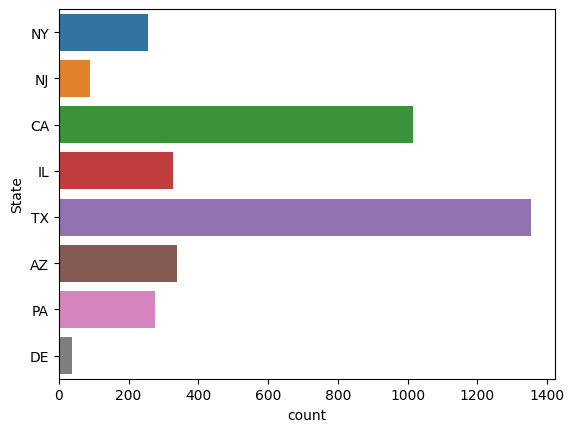

In [264]:
sns.countplot(y='State', data=Biz_df_clean)

<AxesSubplot: xlabel='State', ylabel='Avg_Salary'>

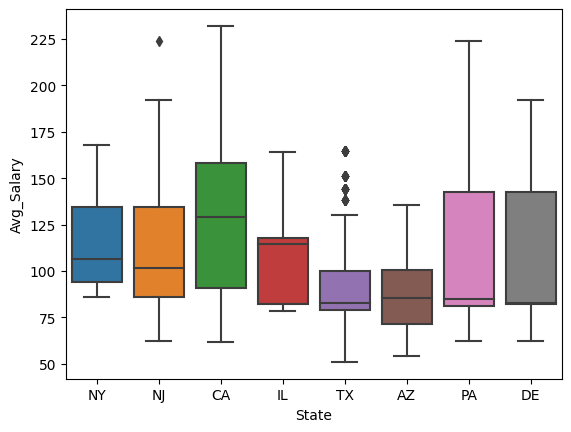

In [265]:
sns.boxplot(x= 'State', y= 'Avg_Salary', data= Biz_df_clean)

<AxesSubplot: xlabel='State', ylabel='Min_Salary'>

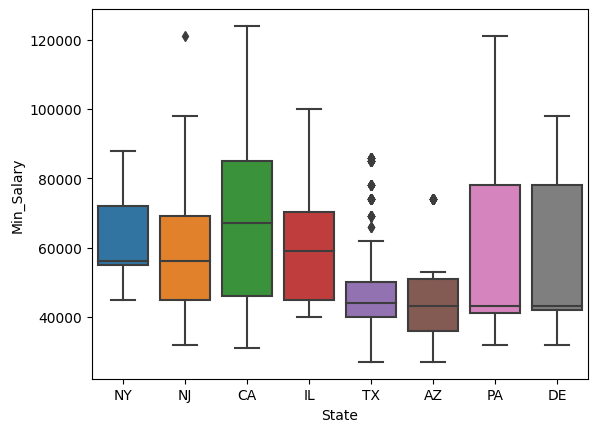

In [266]:
sns.boxplot(x= 'State', y= 'Min_Salary', data= Biz_df_clean)

<AxesSubplot: xlabel='State', ylabel='Max_Salary'>

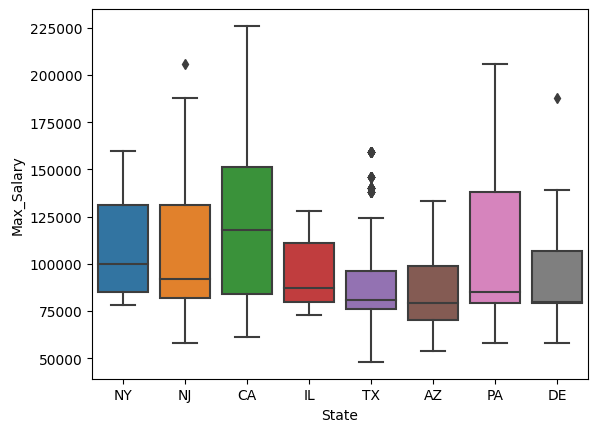

In [267]:
sns.boxplot(x= 'State', y= 'Max_Salary', data= Biz_df_clean)

<AxesSubplot: xlabel='State', ylabel='Rating'>

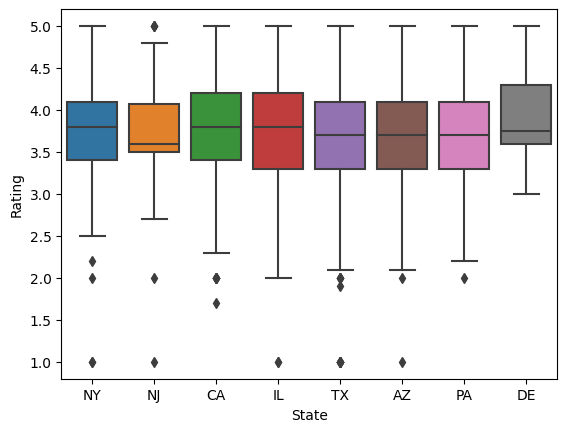

In [268]:
sns.boxplot(x= 'State', y= 'Rating', data= Biz_df_clean)

<AxesSubplot: xlabel='count', ylabel='Sector'>

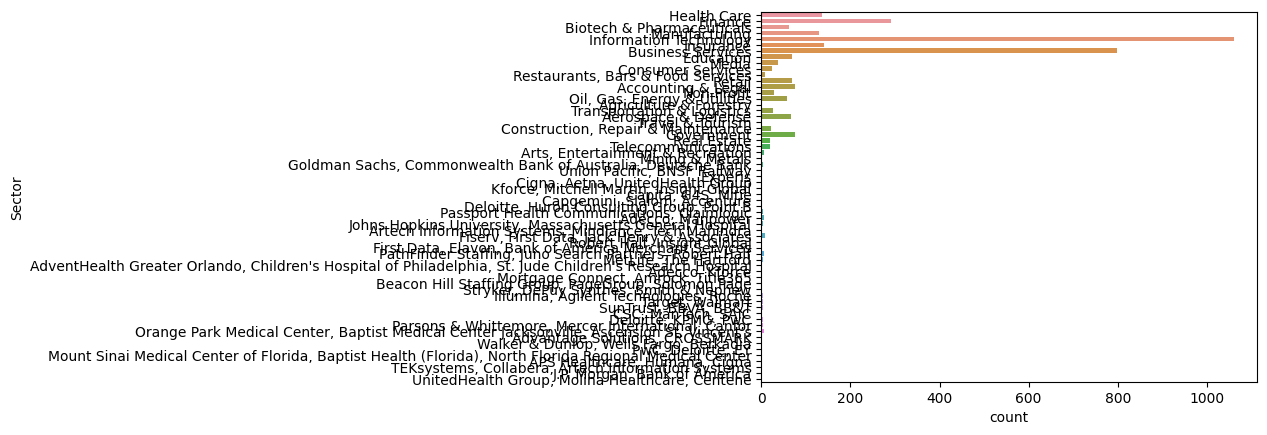

In [269]:
sns.countplot(y='Sector', data= Biz_df_clean)

In [270]:
Biz_df_clean['Sector'].value_counts()

Information Technology                                  1060
Business Services                                        799
Finance                                                  291
Insurance                                                141
Health Care                                              136
                                                        ... 
Artech Information Systems, Mindlance, Tech Mahindra       1
Beacon Hill Staffing Group, PageGroup, Solomon Page        1
Mortgage Connect, Amrock, Title365                         1
Adecco, Kforce                                             1
UnitedHealth Group, Molina Healthcare, Centene             1
Name: Sector, Length: 62, dtype: int64

<AxesSubplot: xlabel='Max_Salary', ylabel='Count'>

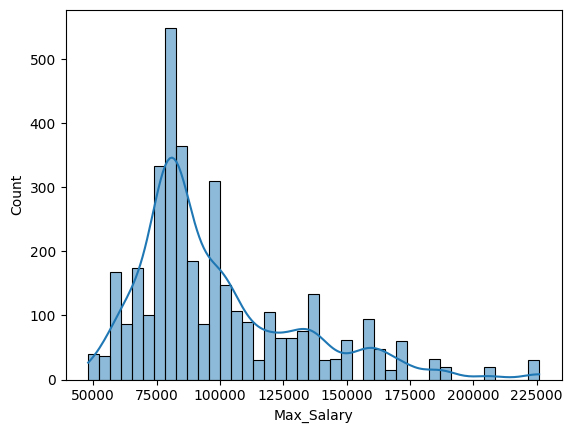

In [271]:
sns.histplot(Biz_df_clean['Max_Salary'], kde= True) 

<AxesSubplot: xlabel='Min_Salary', ylabel='Count'>

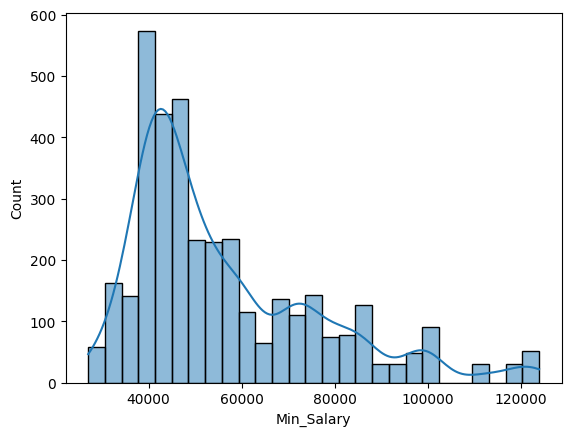

In [272]:
sns.histplot(Biz_df_clean['Min_Salary'], kde= True) 

<AxesSubplot: >

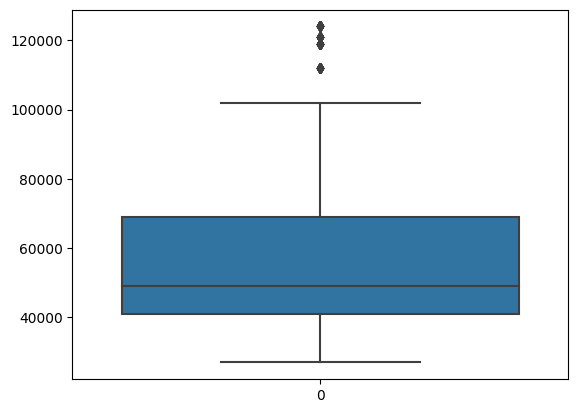

In [273]:
sns.boxplot(Biz_df_clean['Min_Salary']) 

In [274]:
stats.kstest(Biz_df_clean['Max_Salary'],stats.norm.cdf, args=(Biz_df_clean['Max_Salary'].mean(),Biz_df_clean['Max_Salary'].std()))


KstestResult(statistic=nan, pvalue=nan, statistic_location=nan, statistic_sign=-1)